<font size="7"><span style="color: #33D6CC;">MODELO FINAL</span></font>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from pycaret.regression import RegressionExperiment
from pycaret.regression import setup
from pycaret.regression import *
from catboost import CatBoostRegressor

In [15]:
df = pd.read_csv('features_final.csv')
df

,draw_size,J1_ht,J1_age,J2_ht,J2_age,best_of,minutes,J1_rank,J1_rank_points,J2_rank,...,tourney_level_M,J1_hand_L,J1_hand_R,J1_hand_U,J2_hand_L,J2_hand_R,J2_hand_U,estacion_otoño,estacion_primavera,estacion_verano
0,32.0,180.000000,25.0,175.000000,20.0,3,63.0,0.111111,1487.0,0.012821,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,32.0,180.000000,21.0,188.000000,31.0,3,72.0,0.010638,371.0,0.004545,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,32.0,185.000000,25.0,185.000000,21.0,3,101.0,0.012987,468.0,0.004717,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,32.0,180.000000,25.0,173.000000,23.0,3,108.0,0.015385,502.0,0.013889,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,32.0,185.000000,19.0,196.000000,20.0,3,65.0,0.005263,142.0,0.035714,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89200,4.0,175.000000,34.0,185.267928,18.0,3,81.0,0.007353,489.0,0.000902,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
89201,4.0,175.000000,34.0,185.000000,23.0,3,95.0,0.007353,489.0,0.001623,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89202,4.0,185.832809,18.0,185.267928,21.0,3,77.0,0.000902,8.0,0.001351,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
89203,4.0,185.832809,26.0,185.267928,23.0,3,131.0,0.001805,67.0,0.001337,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
X =df.drop(columns='minutes')
y =df['minutes']

In [17]:
    # Dividir los datos en conjuntos de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [18]:
model= CatBoostRegressor()
params={'iterations': [800],#número de árboles de decisión.
        'learning_rate': [0.09,0.1], # tasa de aprendizaje
        'depth' : [3,4], # profundidad, cuanta más, mas sobreajuste
        'subsample': [0.7,0.8], #mas alto, más sobreajuste
        'early_stopping_rounds':[10]
       }
       

n_cv=5
# scoring: lista de metricas a obtener
scoring = ['neg_mean_squared_error', 'r2']

# creamos la GridSeacrh
grid_solver = GridSearchCV(estimator = model, # model to train
                           param_grid = params, # param_grid
                           scoring = scoring,
                           cv = n_cv,
                           refit = 'r2',
                           verbose = 2) # cuanto va a imprimir por pantalla

# entrenamos
model_result = grid_solver.fit(X_train,y_train)

model_result.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0:	learn: 37.3821162	total: 7.81ms	remaining: 6.24s
1:	learn: 36.3184313	total: 15.1ms	remaining: 6.02s
2:	learn: 35.3033898	total: 22.8ms	remaining: 6.05s
3:	learn: 34.4825996	total: 30ms	remaining: 5.97s
4:	learn: 33.7514893	total: 37.1ms	remaining: 5.91s
5:	learn: 33.1351734	total: 43.8ms	remaining: 5.8s
6:	learn: 32.5295061	total: 51.4ms	remaining: 5.82s
7:	learn: 32.0188437	total: 58.2ms	remaining: 5.76s
8:	learn: 31.5931157	total: 64.8ms	remaining: 5.7s
9:	learn: 31.2212739	total: 71.9ms	remaining: 5.68s
10:	learn: 30.8932867	total: 78.2ms	remaining: 5.61s
11:	learn: 30.6226476	total: 84.6ms	remaining: 5.55s
12:	learn: 30.3632083	total: 90.3ms	remaining: 5.47s
13:	learn: 30.1403387	total: 97.1ms	remaining: 5.45s
14:	learn: 29.9227756	total: 103ms	remaining: 5.41s
15:	learn: 29.7424976	total: 109ms	remaining: 5.35s
16:	learn: 29.5758528	total: 115ms	remaining: 5.31s
17:	learn: 29.4217263	total: 121ms	remaining: 5.28s
18:	

In [37]:
y_hat = model_result.predict(X_train)
y_pred = model_result.predict(X_test)

In [38]:
print("Train r2:",model_result.score(X_train, y_train))
print("Train MSE:",mean_squared_error(y_train, y_hat))
print("Test r2:",model_result.score(X_test, y_test))
print("Test MSE:",mean_squared_error(y_test, y_pred))
print('Mejores parámetros:',model_result.best_params_)

Train r2: 0.6250183980971638
Train MSE: 561.4420974012535
Test r2: 0.5940855771332181
Test MSE: 616.667012448773
Mejores parámetros: {'depth': 4, 'early_stopping_rounds': 10, 'iterations': 800, 'learning_rate': 0.1, 'subsample': 0.8}


## Análisis del error

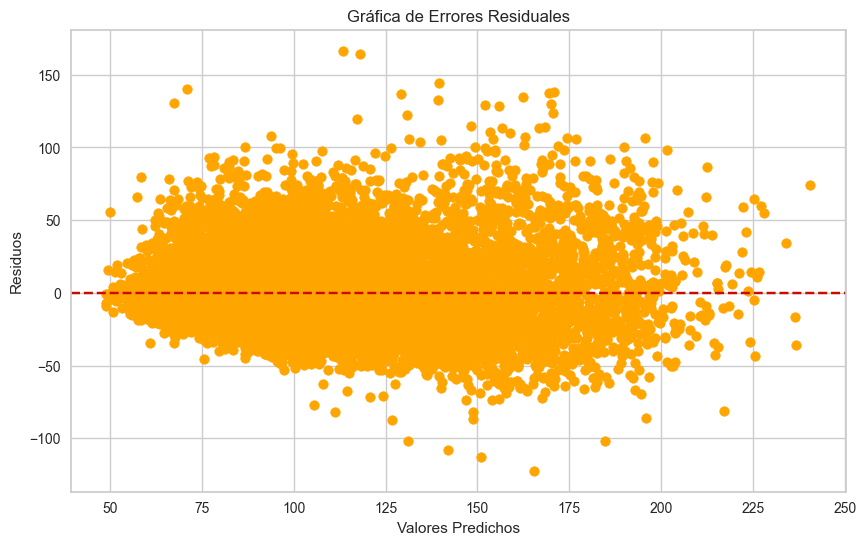

In [39]:
# Gráfica de Errores Residuales
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals,color = 'orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfica de Errores Residuales')
plt.show()

In [40]:
X_test['error']=model_result.predict(X_test)-y_test

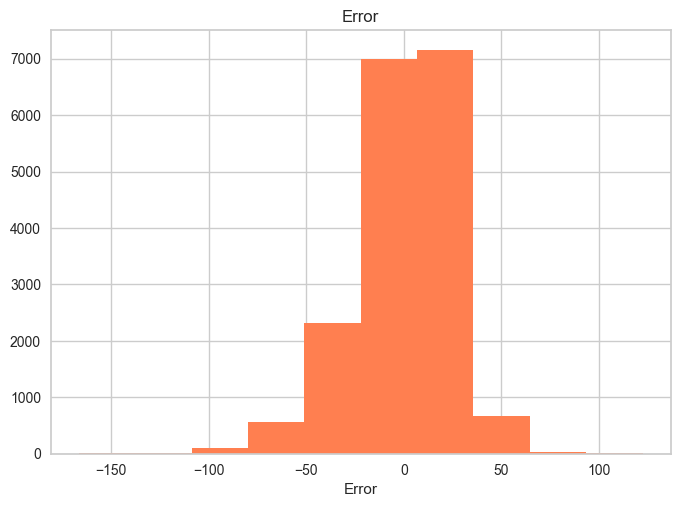

In [42]:
plt.hist(X_test.error,color='coral')
plt.xlabel('Error')
plt.title('Error')
plt.show()

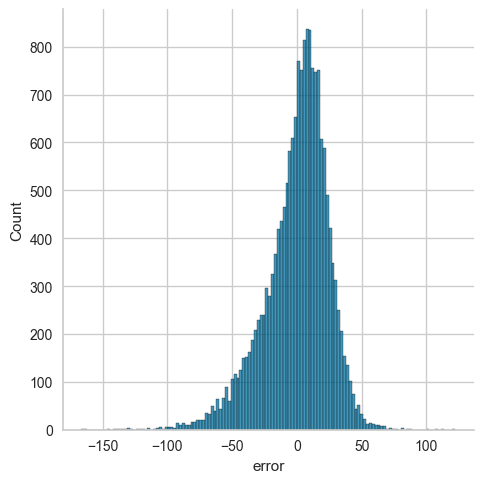

In [43]:
sns.displot(X_test['error'])

In [45]:
X_test.shape

(17841, 71)

In [44]:
error = X_test.query('-50 > error or 50 < error ')
error.shape

(863, 71)

In [46]:
errores = pd.merge(error,y_test,left_index = True,right_index=True)

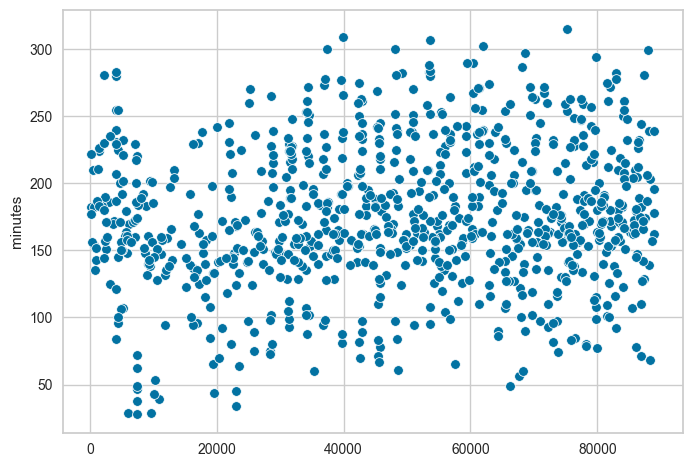

In [50]:
sns.scatterplot(errores['minutes'])#de 150 a 200 es lo que peor 
plt.show()

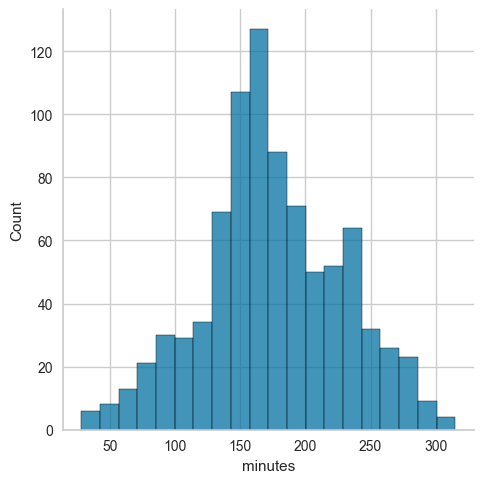

In [51]:
sns.displot(errores['minutes'])

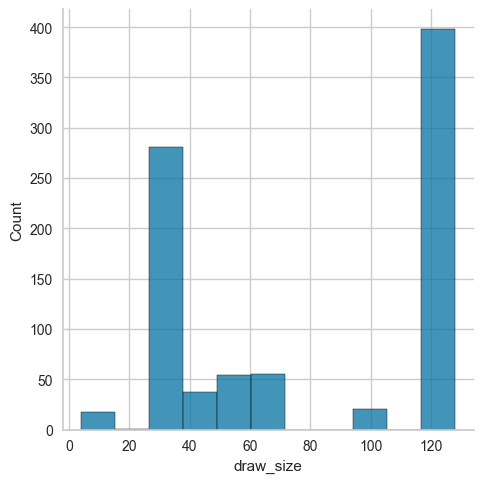

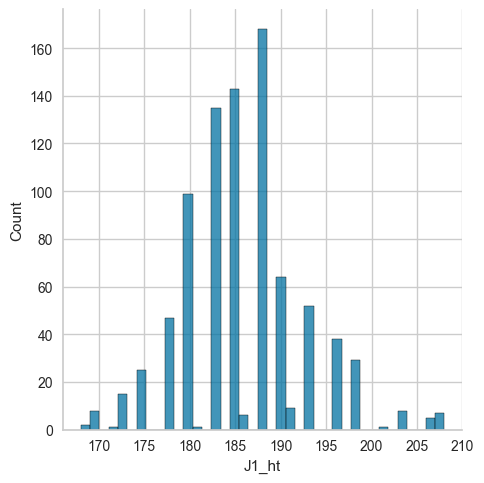

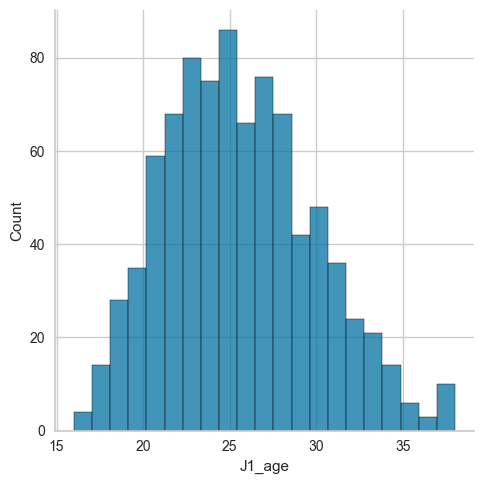

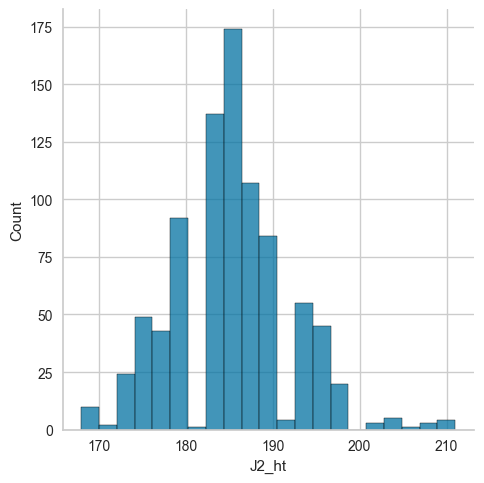

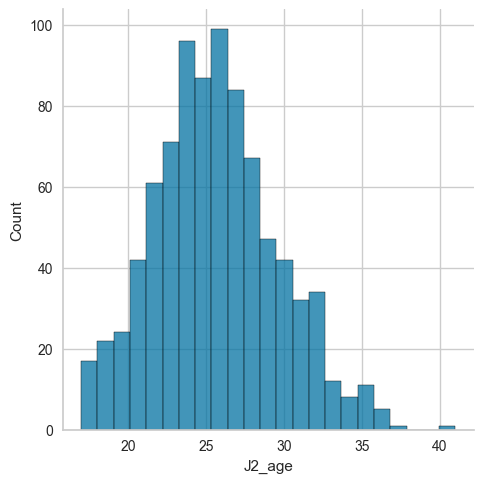

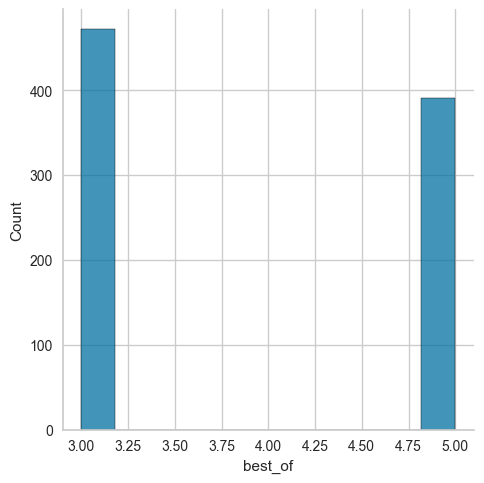

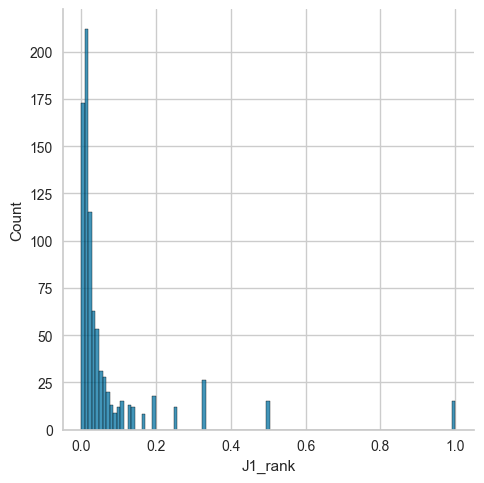

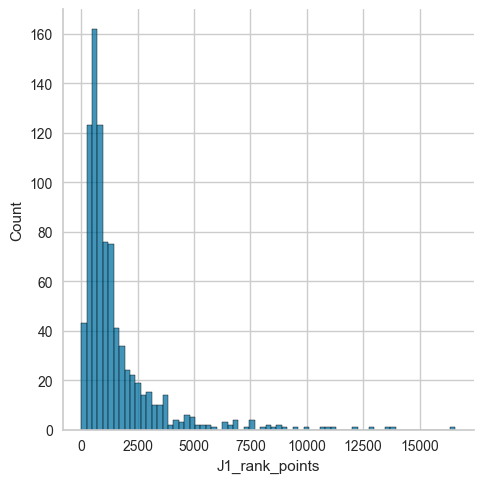

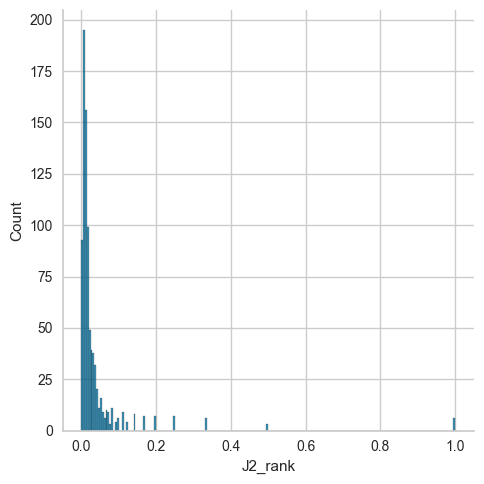

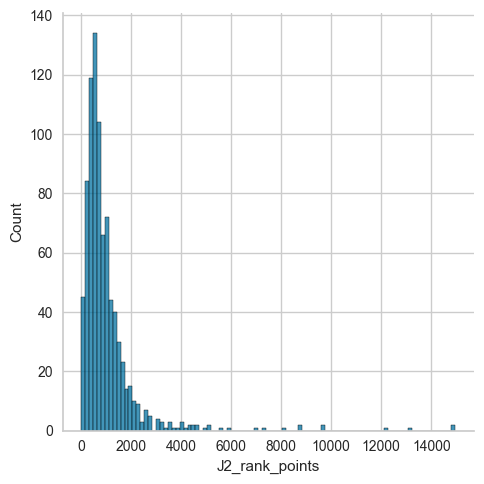

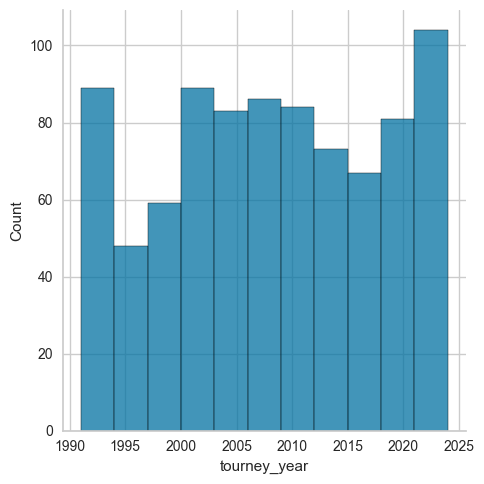

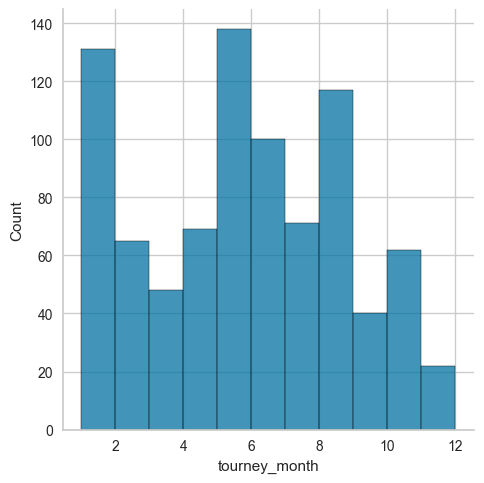

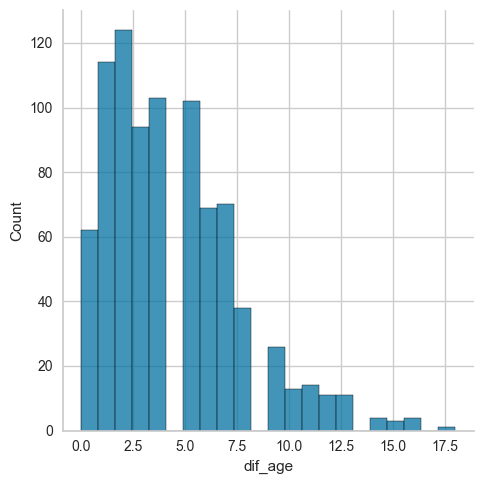

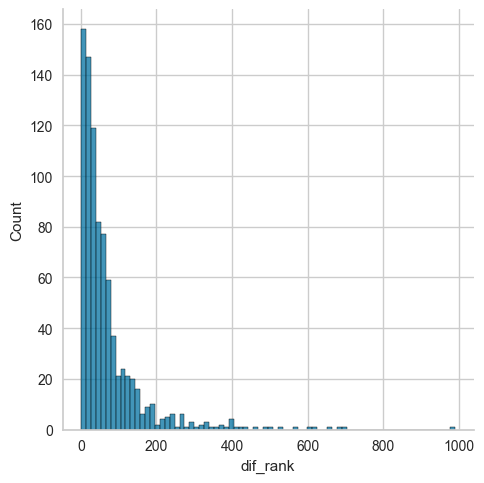

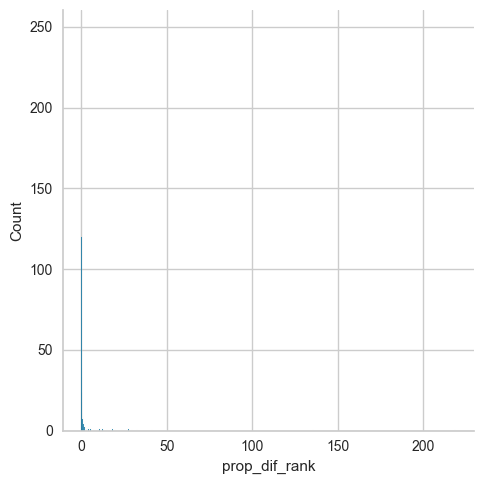

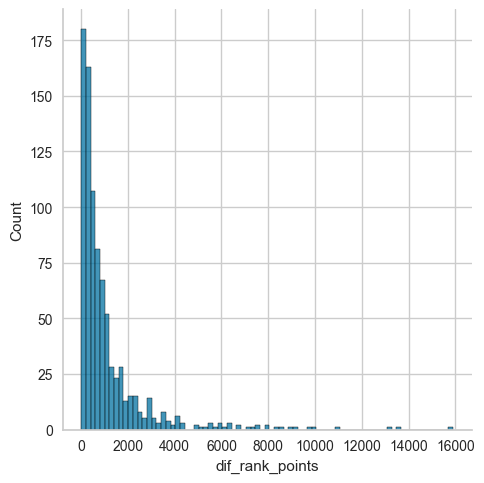

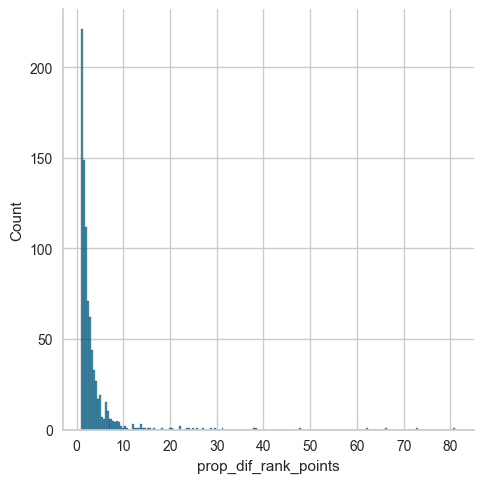

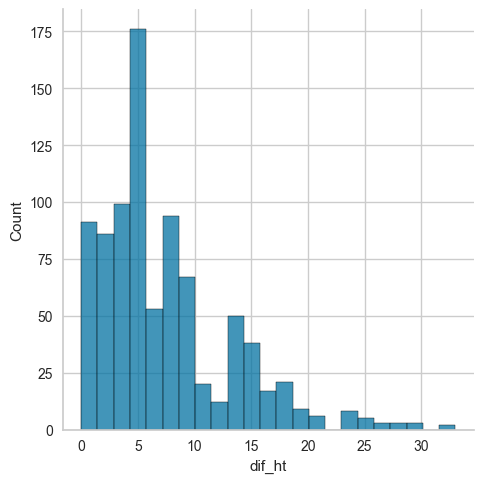

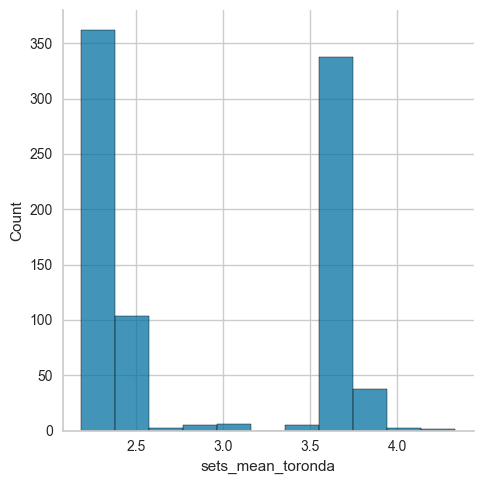

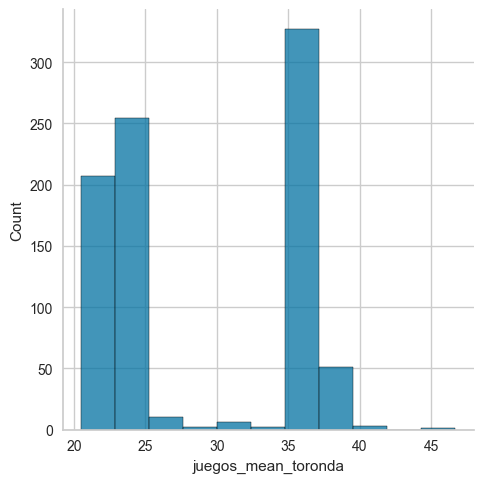

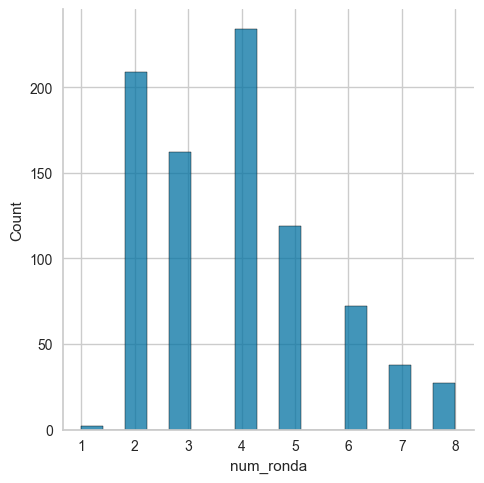

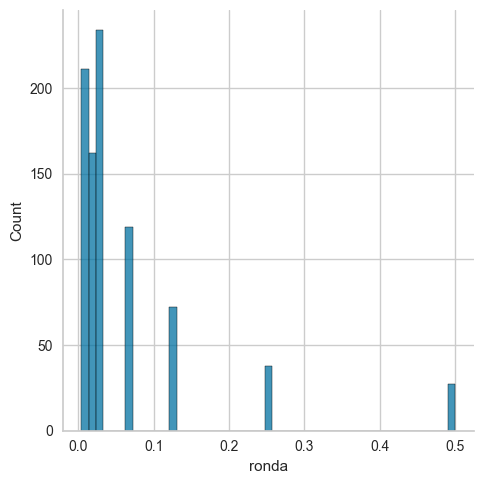

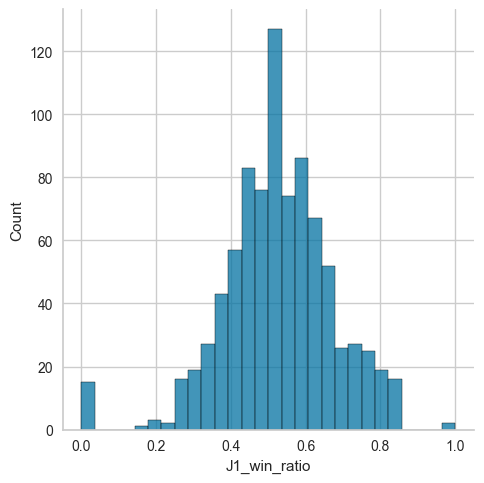

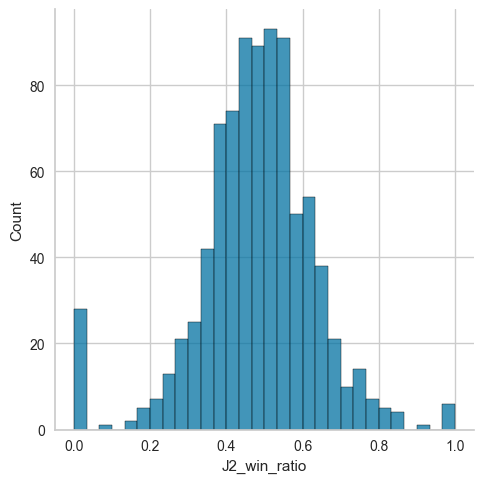

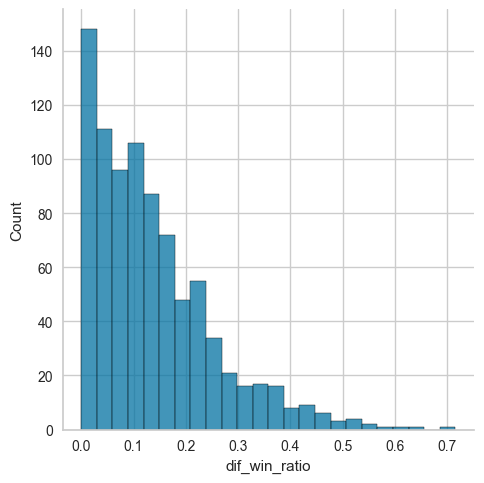

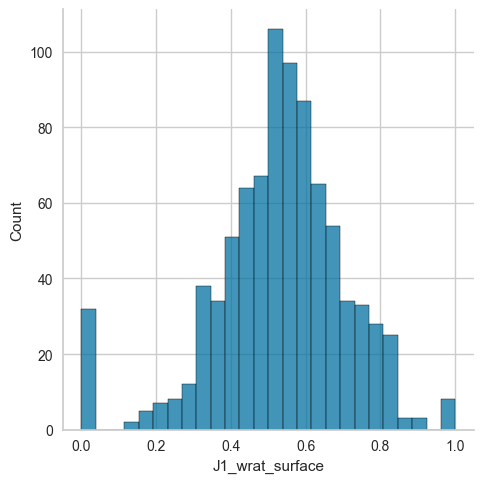

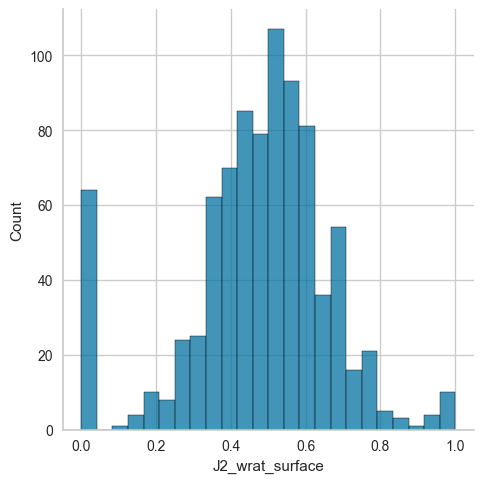

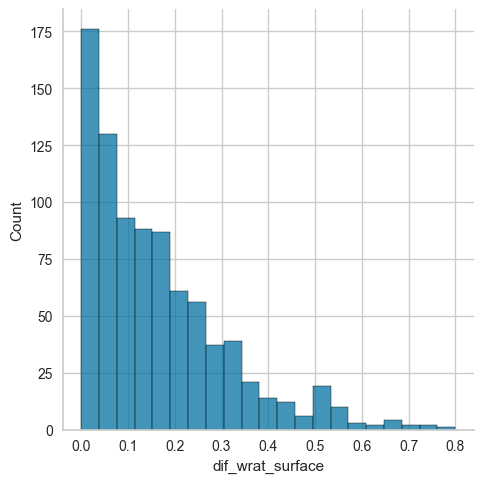

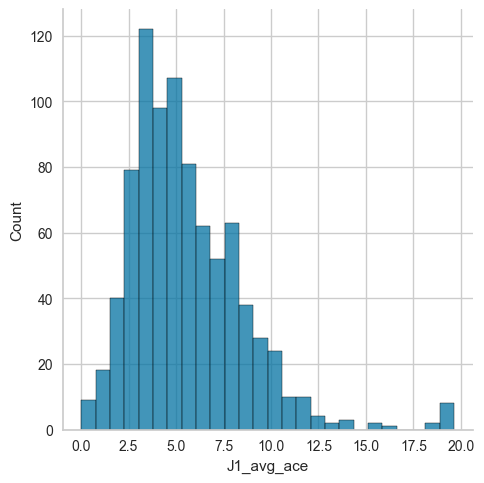

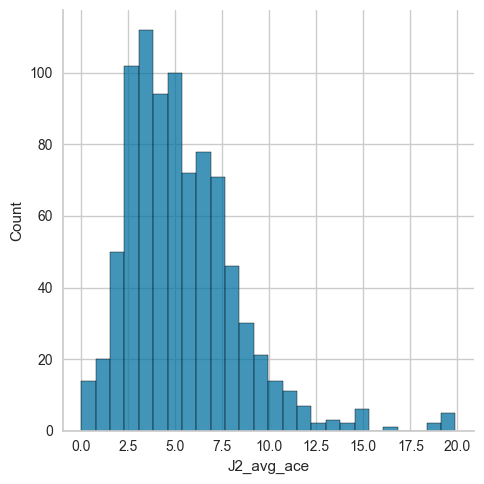

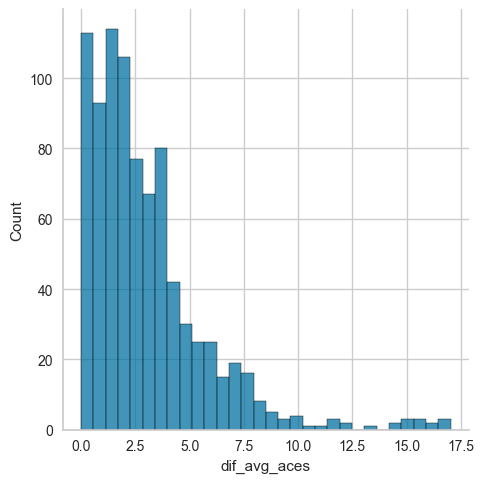

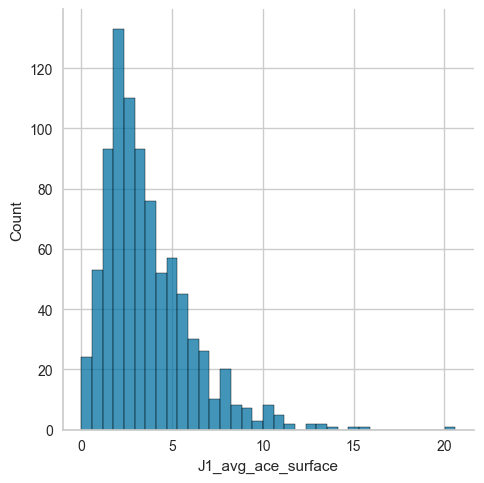

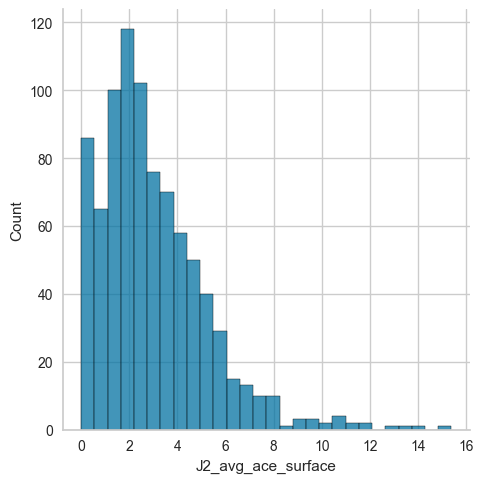

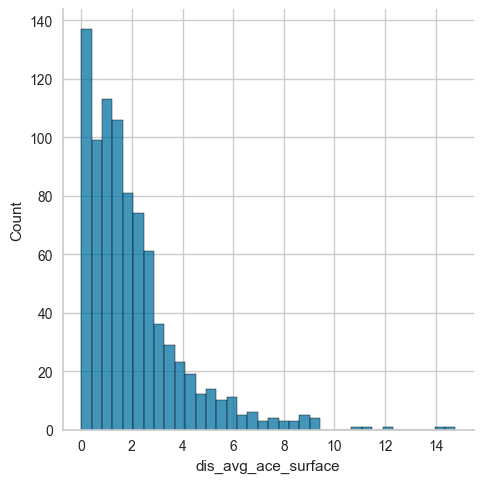

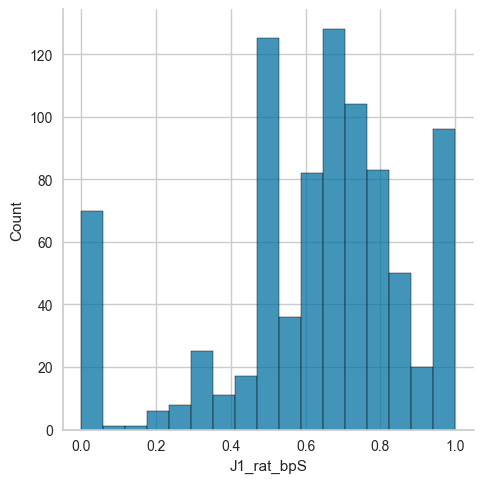

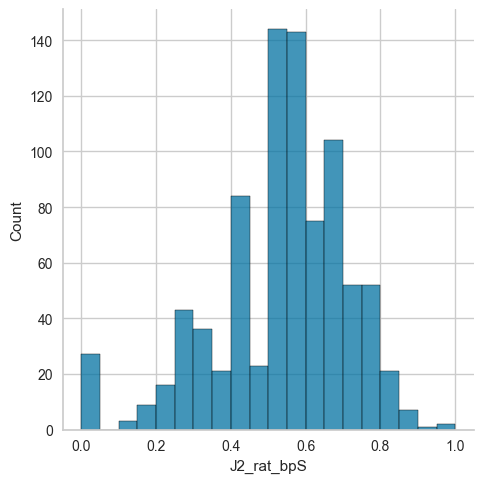

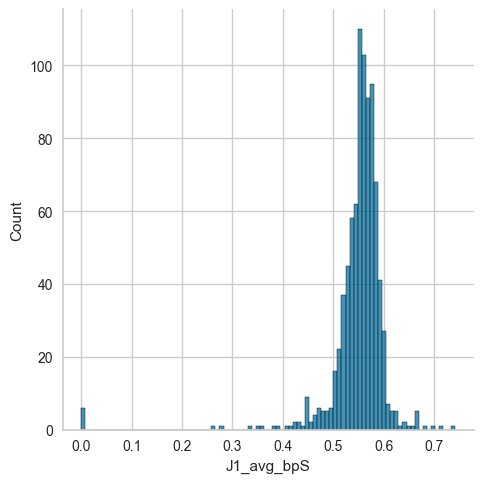

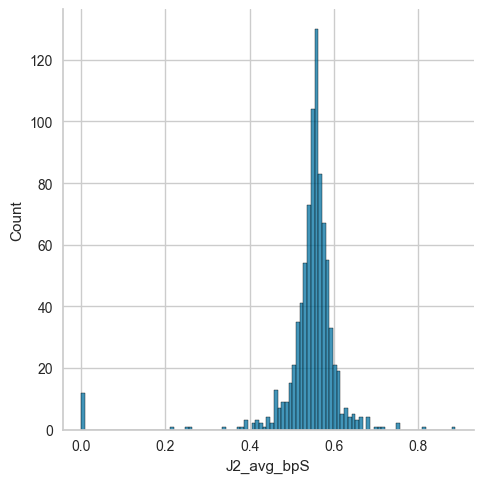

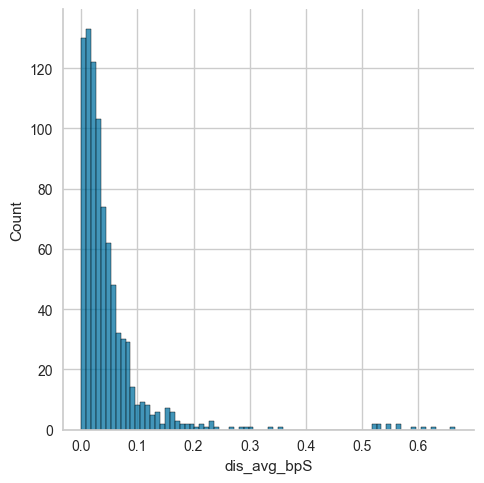

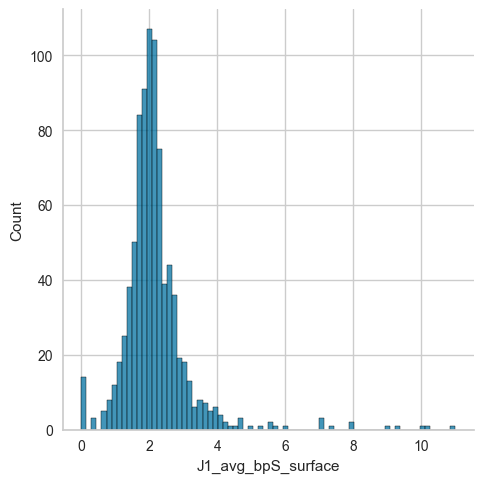

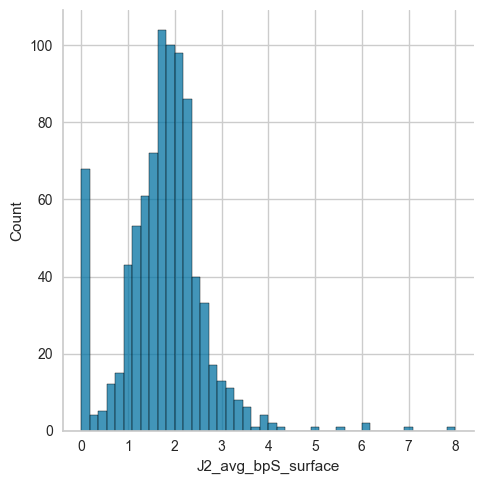

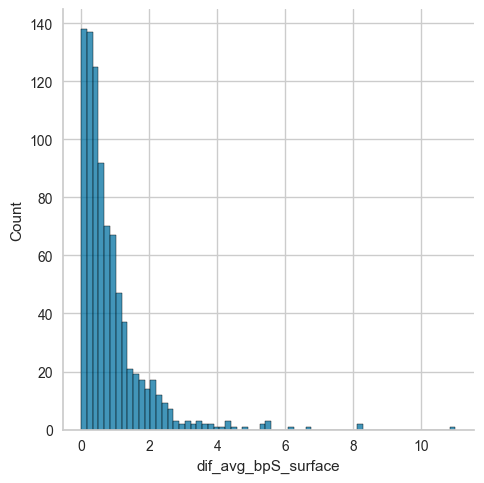

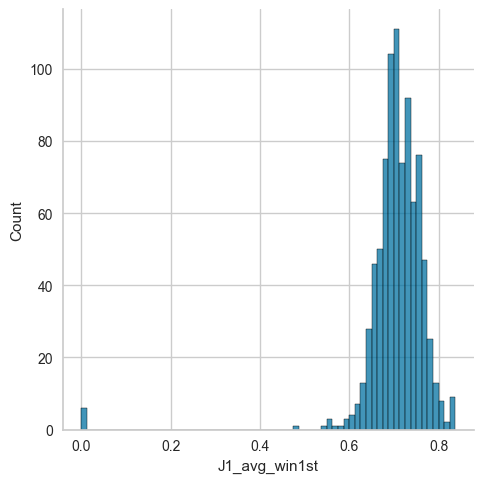

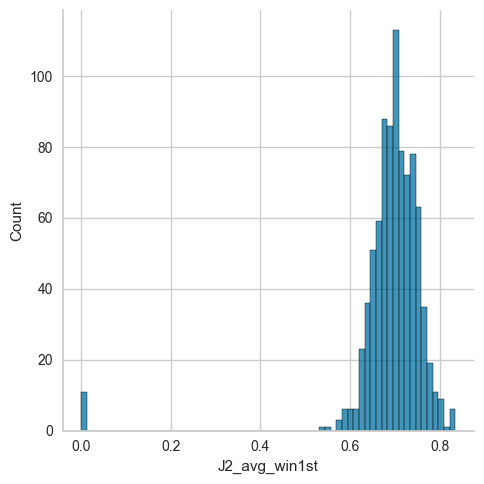

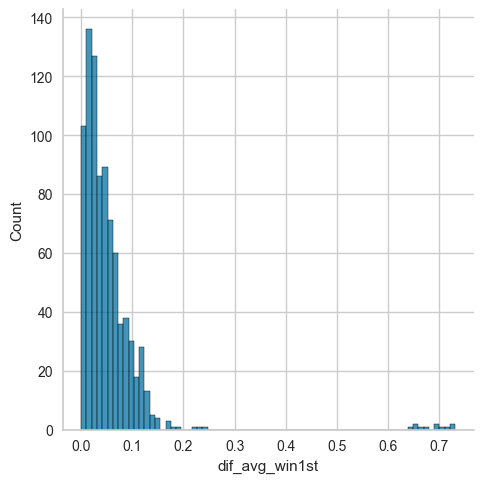

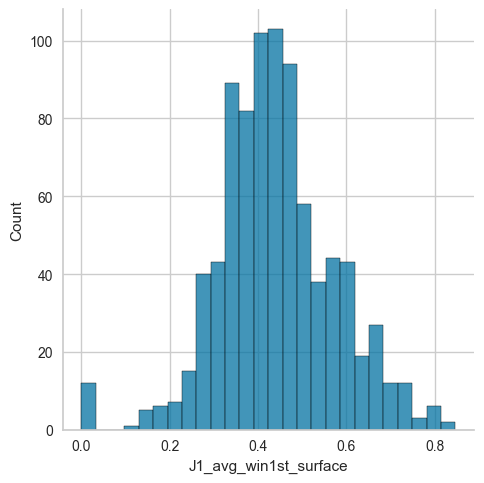

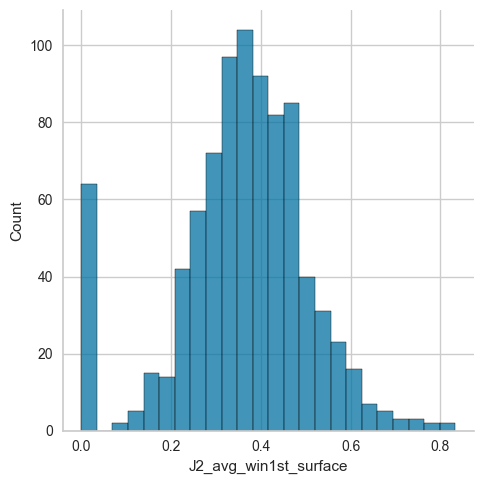

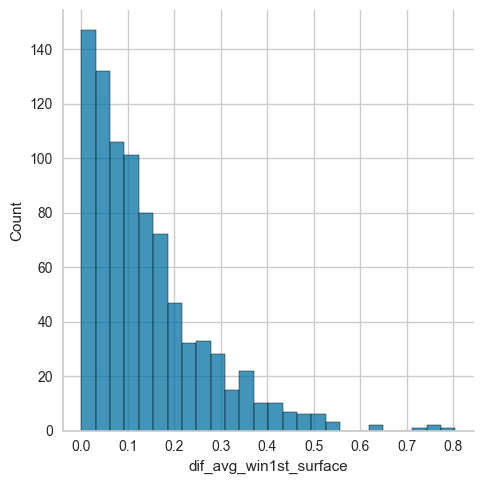

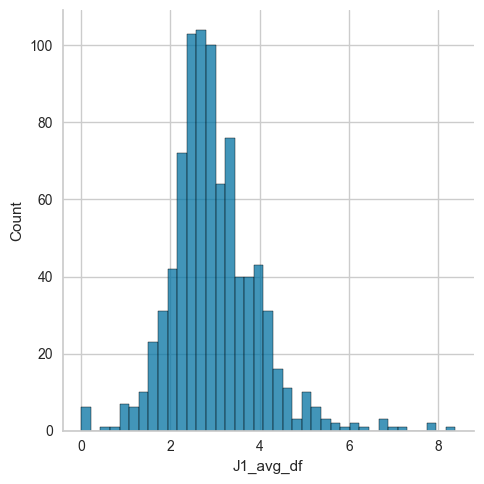

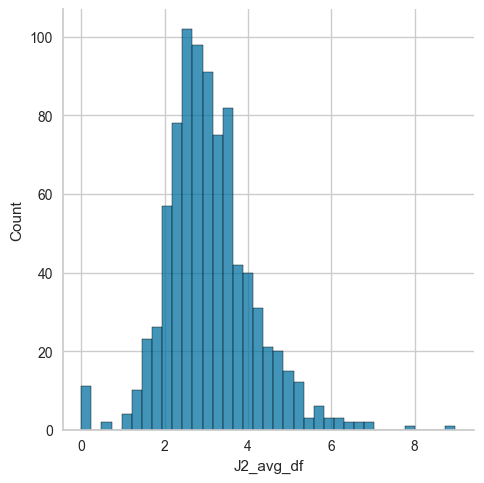

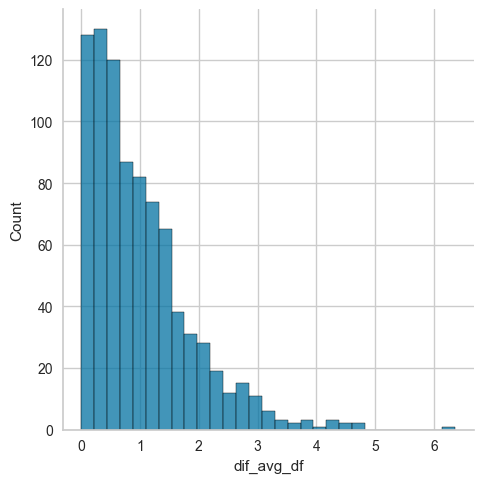

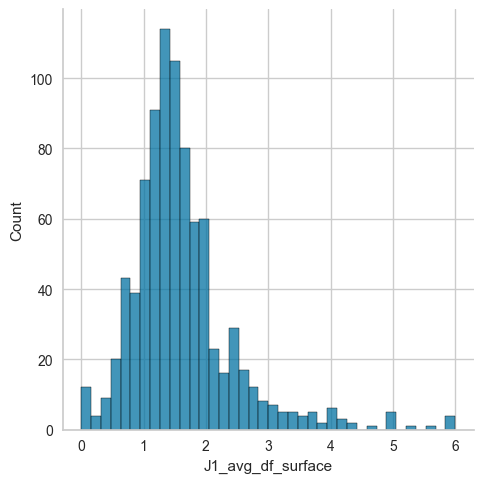

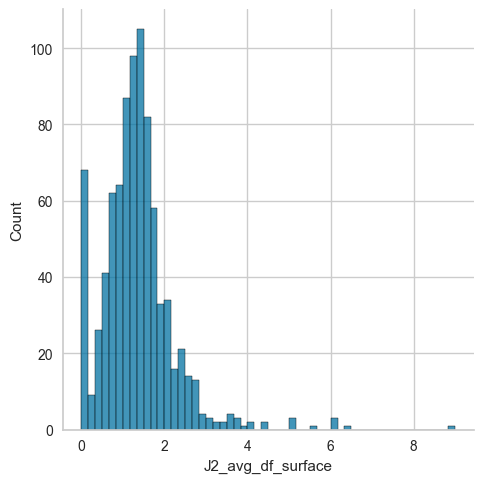

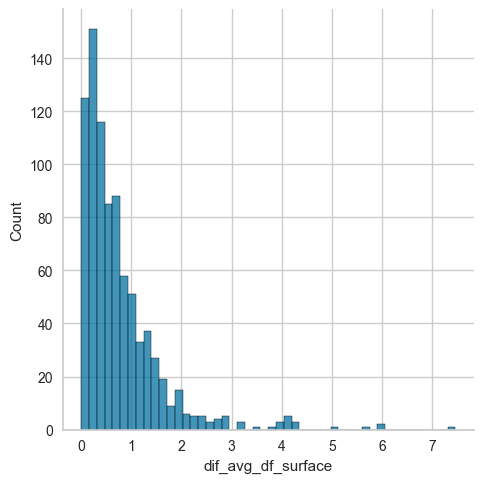

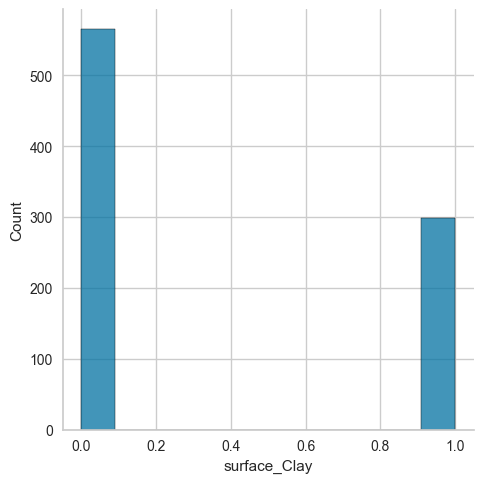

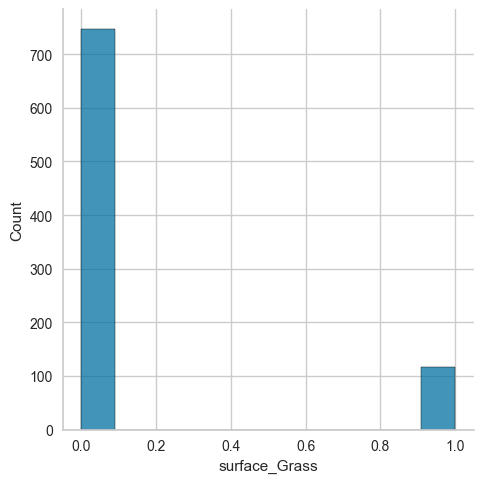

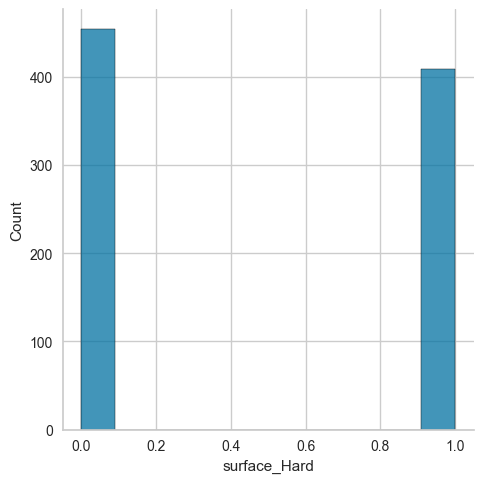

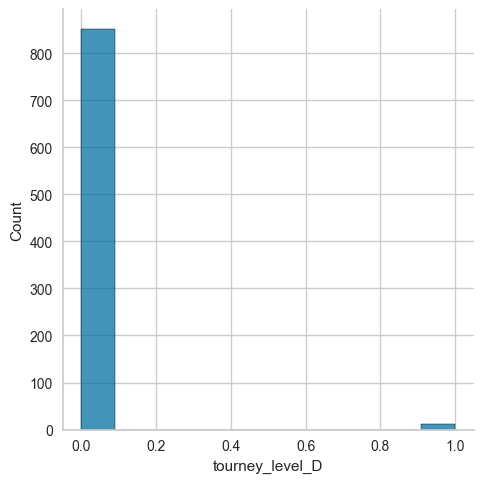

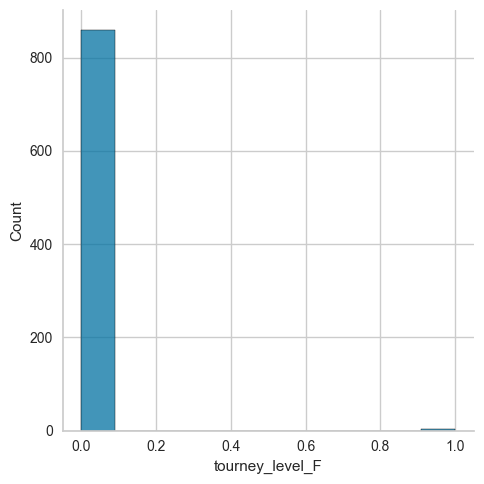

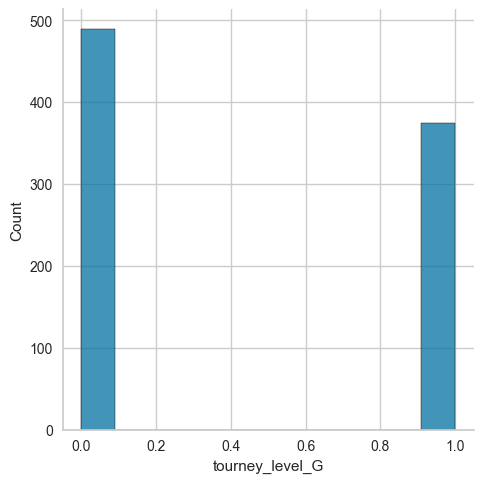

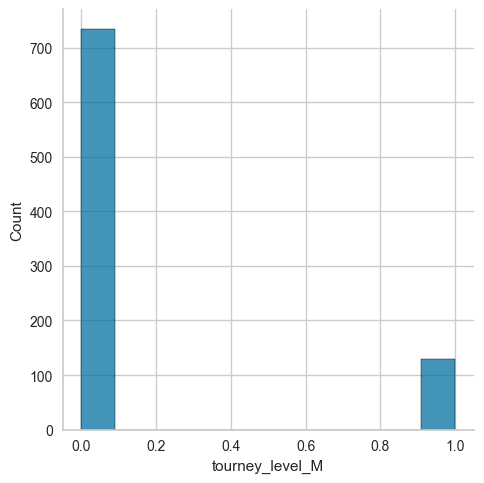

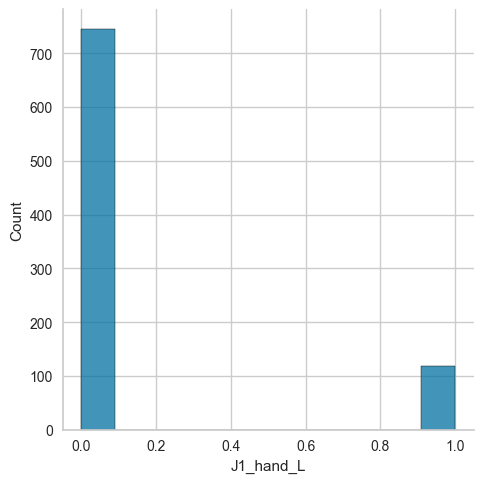

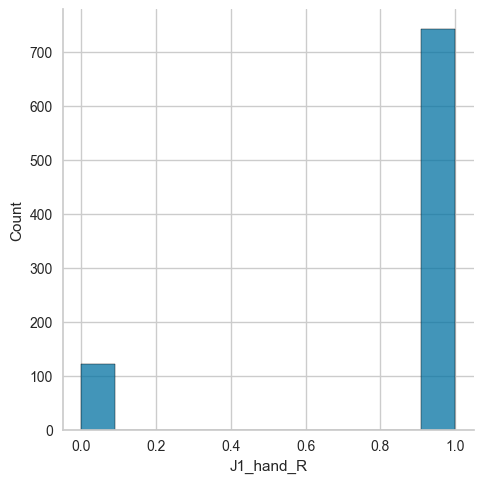

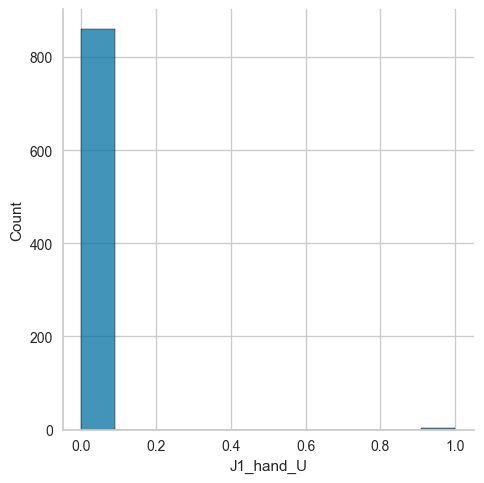

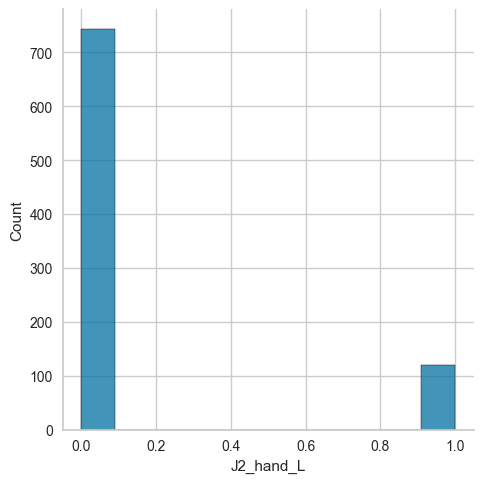

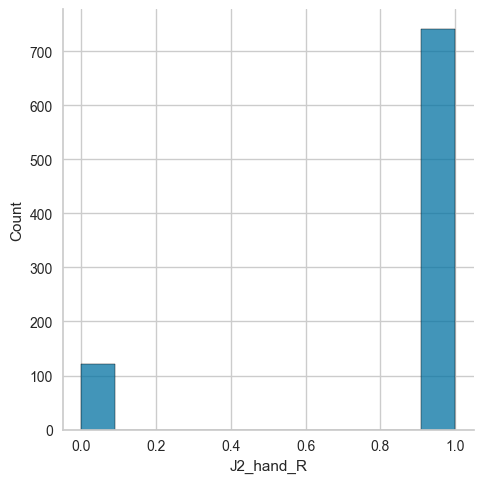

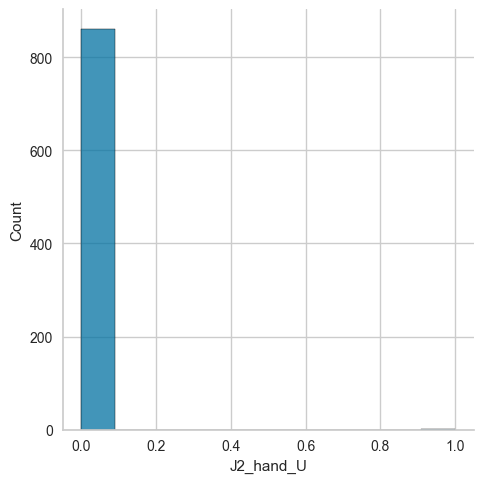

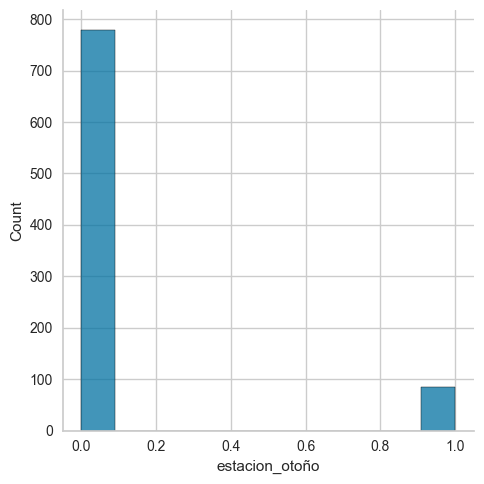

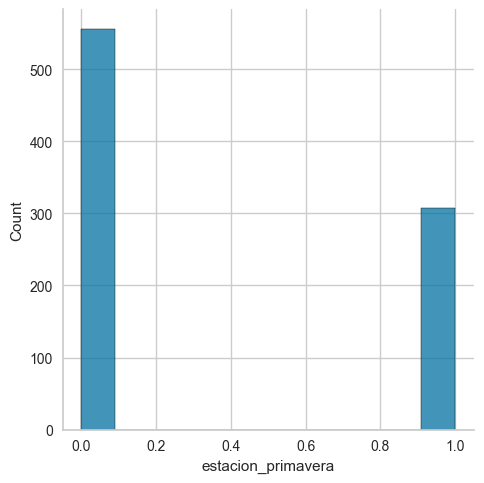

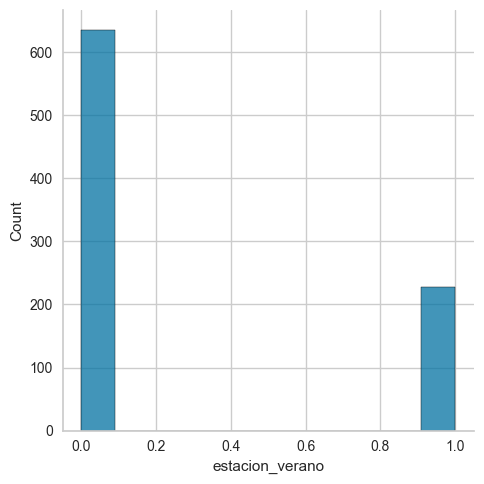

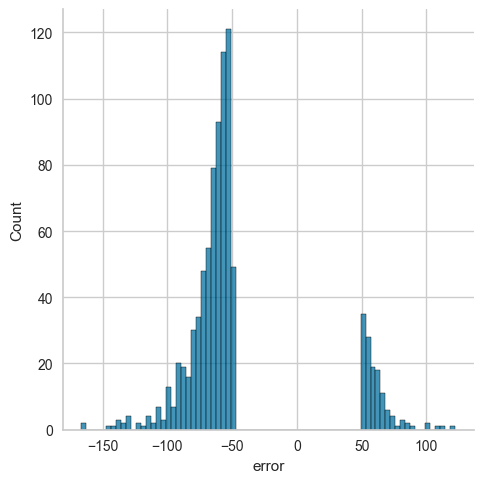

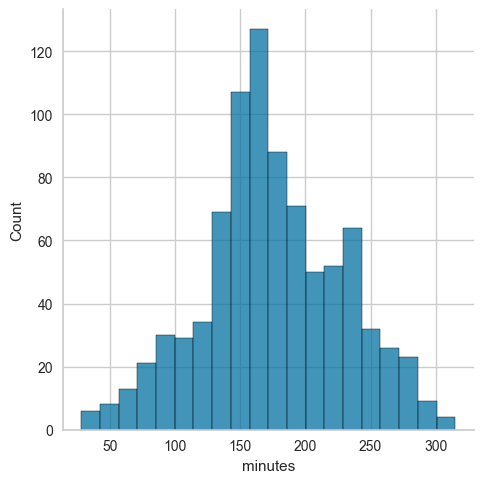

In [52]:
for i in errores:
    sns.displot(errores[i])